In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt


$$\sum \frac{\beta'(t)}{x-t} \Delta t = c - \log(x+1)$$

In [16]:
def convolve_matrix(f1, f2, clow, chigh, rlow, rhigh, num_var):
    # build matrix to solve
    matrix = []

    # answers to integrate to
    ans = []

    spacing = np.linspace(clow,chigh,num_var)

    for x in np.linspace(rlow, rhigh, num_var+1):
        curr_row = []

        # coefficients for the riemann integrals
        for intermediate in x-spacing:
            curr_row.append(f1(intermediate)*((chigh-clow)/num_var))

        # constant term C
        curr_row.append(-1)
        matrix.append(curr_row)
        ans.append(f2(x))
    
    return matrix, ans

In [18]:
def neg_log_plus(x):
    return -np.log(1+x)

def neg_log_minus_square(x):
    return -0.5*np.log(1-x**2)

def recip(x):
    return 1/x

In [43]:
matrix, ans = convolve_matrix(recip, neg_log_minus_square, -0.999, 0.999, -0.9999, 0.9999, 400)

Text(0.5, 1.0, '$\\beta(x)$ for target function: $-0.5 \\cdot \\log(1-x^2)$, subdivision: 400')

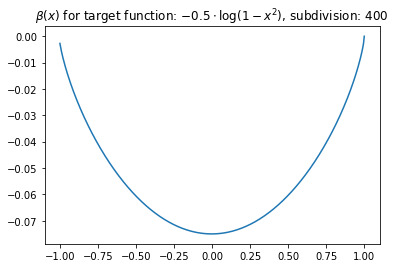

In [44]:
fig, ax = plt.subplots()

ax.plot(np.linspace(-1,1,400),(2/400)*np.cumsum((np.linalg.inv(matrix)@ans)[:-1]))
ax.set_title(r"$\beta(x)$ for target function: $-0.5 \cdot \log(1-x^2)$, subdivision: 400")

Text(0.5, 1.0, "$\\beta'(x)$ for target function: $-0.5 \\cdot \\log(1-x^2)$, subdivision: 400")

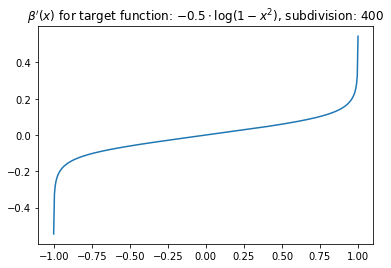

In [45]:
fig, ax = plt.subplots()

ax.plot(np.linspace(-1,1,400), (np.linalg.inv(matrix)@ans)[:-1])

ax.set_title(r"$\beta'(x)$ for target function: $-0.5 \cdot \log(1-x^2)$, subdivision: 400")

In [35]:
(np.linalg.inv(matrix)@ans)[-1]

-0.2689676673727243